In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


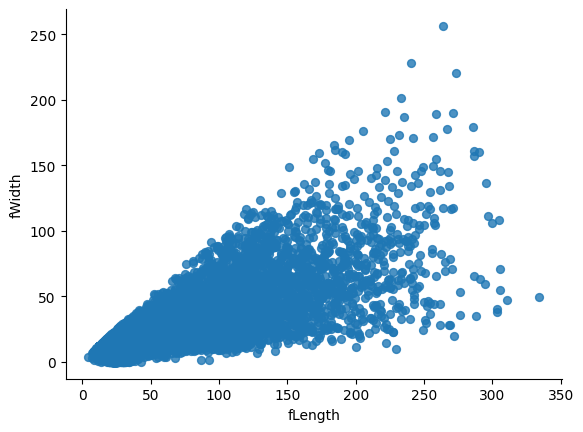

In [ ]:
# @title fLength vs fWidth

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='fLength', y='fWidth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


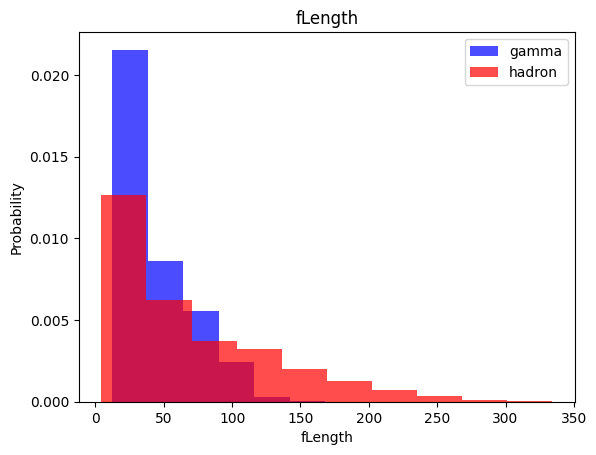

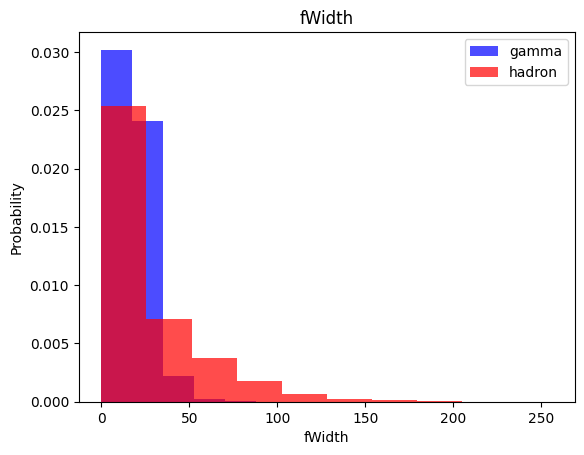

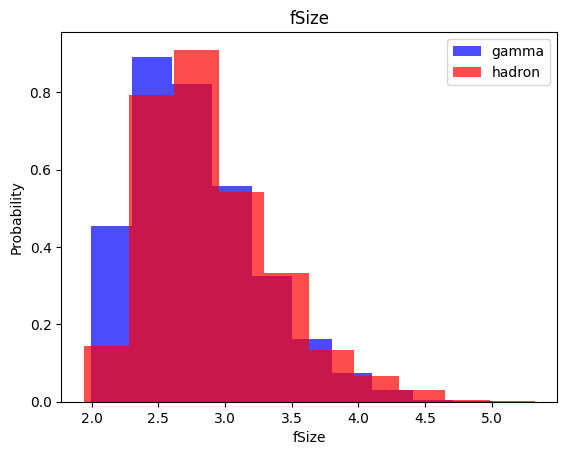

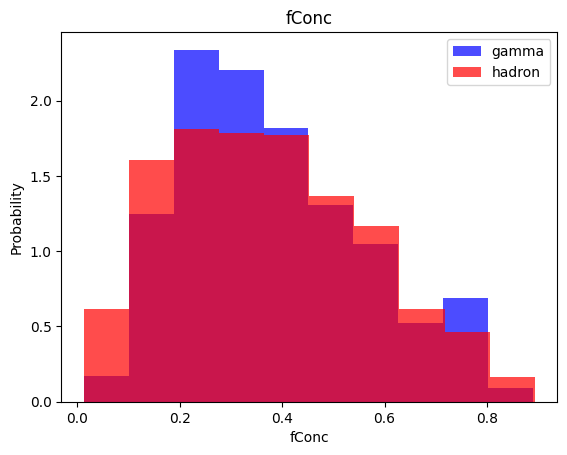

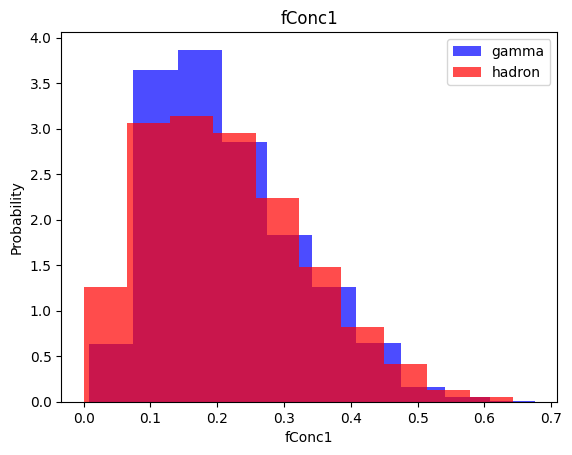

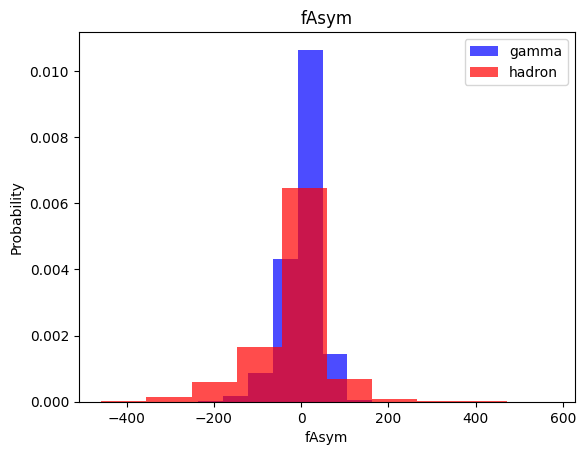

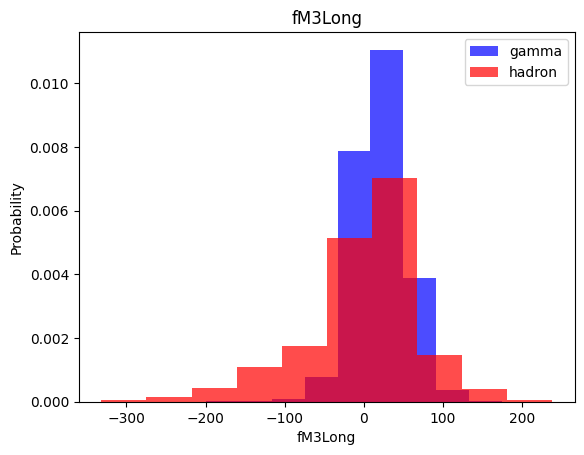

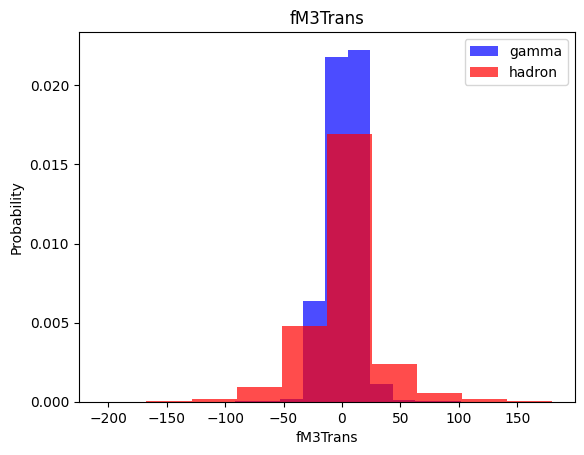

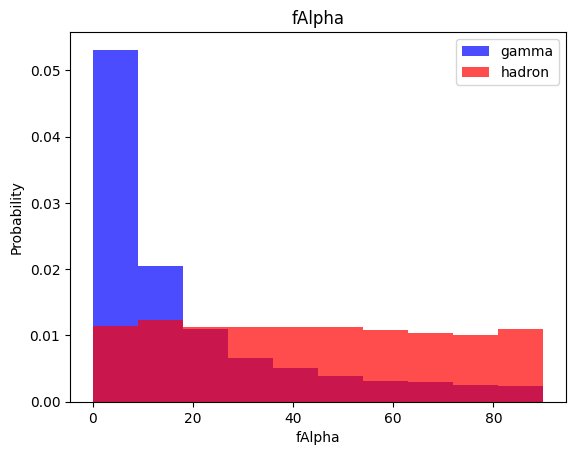

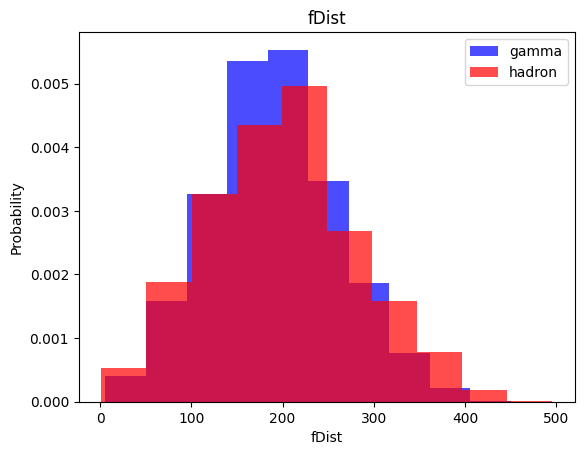

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, validation, test datasets:

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(df, oversample=False):
  X = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
print(len(train[train["class"] == 1]))
print(len(train[train["class"] == 0]))

7404
4008


In [ ]:
d_train, X_train, y_train = scale_dataset(train, oversample=True)
d_valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
d_test, X_test, y_test = scale_dataset(test, oversample=False)
print(sum(y_train == 1))
print(sum(y_train == 0))
print(sum(y_train == 0) + sum(y_train == 0))

7404
7404
14808


In [ ]:
X_train

array([[-0.6626024 , -0.20709531, -0.05220642, ...,  0.39352659,
         0.26585544, -1.64660057],
       [ 0.69289982,  0.14221837,  1.04237659, ..., -0.74722593,
        -0.66116184,  1.02684055],
       [-0.07731905, -0.29100474, -0.7279245 , ..., -0.47916145,
         1.53202315, -1.52161735],
       ...,
       [-0.41752096, -1.15888594, -0.29363992, ...,  0.30063148,
         0.62065613, -0.46053063],
       [ 2.98204666,  1.60718984,  1.07448324, ..., -1.15228438,
         0.42826912,  0.08869219],
       [-0.52589891, -0.50703196, -0.20935999, ...,  0.3082329 ,
         0.57559257,  0.29855446]])

In [ ]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
12147,25.3591,18.4557,2.8028,0.4110,0.2197,15.0357,20.7470,8.3170,34.5962,71.3507,1
1408,82.2580,24.8821,3.3210,0.1590,0.0833,38.6357,89.8179,-15.4092,10.4290,270.5980,1
17347,49.9271,16.9120,2.4829,0.4375,0.2286,-49.6099,-40.0841,-9.8338,67.6050,80.6655,0
13957,20.6646,12.6322,2.3589,0.5208,0.3304,15.6523,15.3380,5.2813,54.3460,244.1900,0
6919,36.0925,21.3894,3.0892,0.2647,0.1429,-10.8461,-13.8353,-9.5419,29.3300,166.4910,1
...,...,...,...,...,...,...,...,...,...,...,...
12114,21.1689,11.1289,2.3365,0.5945,0.3433,14.8489,18.8123,4.4605,27.2976,98.4951,1
3415,21.9740,11.5300,2.3201,0.6077,0.3086,-10.7185,-20.5018,-9.2090,23.4520,192.4410,1
16749,128.9307,79.0323,3.2180,0.1973,0.0983,-125.3996,-63.1082,-37.8081,12.6302,328.1884,0
17691,31.9845,20.2225,2.7638,0.2894,0.1611,39.0465,22.3686,3.6706,41.1956,220.9210,0


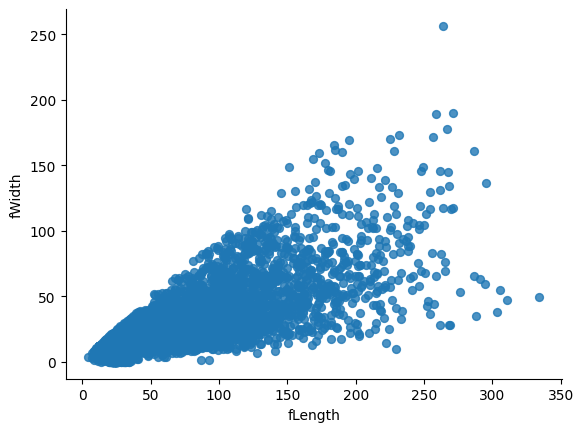

In [ ]:
from matplotlib import pyplot as plt
train.plot(kind='scatter', x='fLength', y='fWidth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

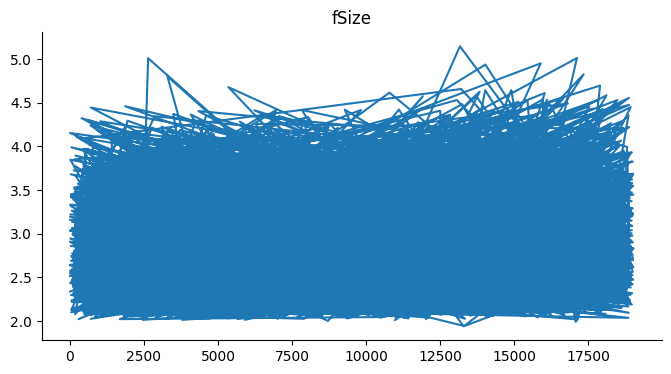

In [ ]:
from matplotlib import pyplot as plt
train['fSize'].plot(kind='line', figsize=(8, 4), title='fSize')
plt.gca().spines[['top', 'right']].set_visible(False)

# **KNN (K Nearest Neighbors)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=100)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
y_predictions = knn_model.predict(X_test)

In [ ]:
y_predictions

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
y_test

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1356
           1       0.85      0.89      0.87      2448

    accuracy                           0.83      3804
   macro avg       0.82      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_predictions = nb_model.predict(X_test)

In [ ]:
y_predictions

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
y_test

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52      1356
           1       0.73      0.90      0.81      2448

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804

